<a href="https://colab.research.google.com/github/christophersingh/Car-CNN-Capstone/blob/main/parkingspotdetectorMobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import json
from matplotlib.ticker import FormatStrFormatter
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q kaggle
from google.colab import files 
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d daggysheep/find-a-car-park

!unzip find-a-car-park.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/Full/img_729160007.jpg  
  inflating: data/Full/img_729163006.jpg  
  inflating: data/Full/img_730080006.jpg  
  inflating: data/Full/img_730083006.jpg  
  inflating: data/Full/img_731170006.jpg  
  inflating: data/Full/img_731230006.jpg  
  inflating: data/Full/img_801010006.jpg  
  inflating: data/Full/img_801063006.jpg  
  inflating: data/Full/img_802063006.jpg  
  inflating: data/Full/img_802070006.jpg  
  inflating: data/Full/img_802073006.jpg  
  inflating: data/Full/img_802080006.jpg  
  inflating: data/Full/img_803043006.jpg  
  inflating: data/Full/img_803173006.jpg  
  inflating: data/Full/img_808171558.jpg  
  inflating: data/Full/img_808172159.jpg  
  inflating: data/Full/img_809023602.jpg  
  inflating: data/Full/img_809024602.jpg  
  inflating: data/Full/img_809025102.jpg  
  inflating: data/Full/img_809040602.jpg  
  inflating: data/Full/img_809042103.jpg  
  inflating: data/Full/img_809045603.jpg  
  i

In [ ]:
from PIL import Image
import os

def is_valid_jpg(filename):
  try:
    i=Image.open(filename)
    return i.format =='JPEG'
  except IOError:
    return False

def remove_corrapted_images_from_folder(cdir, verbose=False):
  total=0
  counter = 0
  for subdir, dirs, files in os.walk(cdir):
      for filename in files:
          filepath = subdir + os.sep + filename
          if filepath.endswith(".jpg") or filepath.endswith(".png"):
            total += 1
            if not is_valid_jpg(filepath):
              counter +=1
              os.remove(filepath)
              if (verbose):
                print(f"--Removed file ${filepath}")
  print(f"{counter} jpeg files removed out of {total} in folder {cdir}")

free_dir = "/content/data/data/Free"
full_dir = "/content/data/data/Full"

remove_corrapted_images_from_folder(free_dir) 
remove_corrapted_images_from_folder(full_dir)

0 jpeg files removed out of 1067 in folder /content/data/data/Free
0 jpeg files removed out of 2195 in folder /content/data/data/Full


In [ ]:
X=[]
Z=[]
IMG_SIZE=128
FREE_DIR='/content/data/Free'
FULL_DIR='/content/data/Full'

In [ ]:
def assign_label(img,label):
    return label

In [ ]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,label)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical


from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image



In [ ]:
make_train_data('Free',FREE_DIR)

100%|██████████| 1067/1067 [00:34<00:00, 31.22it/s]


In [ ]:
make_train_data('Full',FULL_DIR)

100%|██████████| 2195/2195 [01:11<00:00, 30.87it/s]


In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout,Conv2D, MaxPool2D, BatchNormalization, Activation
from keras.layers.core import Flatten, Dense, Dropout, Lambda

In [ ]:
batch_size=128
epochs=50

# use callback only ReduceLROnPlateau
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=5,verbose=1,factor=0.1)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1,
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True, 
        vertical_flip=False) 


datagen.fit(x_train)

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.mobilenet import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from skimage import io 
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense, BatchNormalization

In [95]:
base_model=MobileNet(weights='imagenet',include_top=False) 

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2,activation='softmax'))

"x=base_model.output\nx=GlobalAveragePooling2D()(x)\nx=Dense(1024,activation='relu')(x) \nx=Dense(1024,activation='relu')(x) \nx=Dense(512,activation='relu')(x) \npreds=Dense(2,activation='softmax')(x)"

In [96]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_15 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 1026      
Total params: 5,853,890
Trainable params: 5,832,002
Non-trainable params: 21,888
______________________________________

In [97]:
for i, layer in enumerate(model.layers):
   if (i==0):
     layer.trainable = False 
     print(f"Layer {i} (Non-trainable): {layer}")
   else:
      layer.trainable = True 
      print(f"Layer {i} (Trainable): {layer}")

Layer 0 (Non-trainable): <tensorflow.python.keras.engine.functional.Functional object at 0x7ff5fdaac0b8>
Layer 1 (Trainable): <tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7ff5fe05d9e8>
Layer 2 (Trainable): <tensorflow.python.keras.layers.core.Dense object at 0x7ff5fdacd2e8>
Layer 3 (Trainable): <tensorflow.python.keras.layers.core.Dense object at 0x7ff5fd890550>
Layer 4 (Trainable): <tensorflow.python.keras.layers.core.Dense object at 0x7ff5fd827630>
Layer 5 (Trainable): <tensorflow.python.keras.layers.core.Dense object at 0x7ff5fd82d518>


In [63]:
parent_dir = "/content/data/data"
os.chdir(parent_dir)
category_list = list(filter(lambda x: os.path.isdir(x), os.listdir()))

!rm -rf .ipynb_checkpoints/
for category in category_list:
  print(category)

Full
test
train
valid
Free


In [50]:
data_set_dirs= ['train','valid','test']
for dsdirs in data_set_dirs:
  path = parent_dir + '/'+ dsdirs
  os.mkdir( path,755 )

In [51]:
import math
train_prop = 0.8
valid_prop = test_prop = (1-train_prop)/2

def create_dataset():
  for ii,cat in enumerate(category_list):    
    src_path = parent_dir + '/' + cat
    dest_dir1 = parent_dir+'/train/'+str(ii)
    dest_dir2 = parent_dir+'/valid/'+str(ii)
    dest_dir3 = parent_dir+'/test/'+str(ii)
    
    dest_dirs_list = [dest_dir1,dest_dir2,dest_dir3]
    for dirs in dest_dirs_list:
      os.mkdir(dirs,755 )
    
    #get files' names list from respective directories
    os.chdir(src_path)
    files = [f for f in os.listdir() if os.path.isfile(f)]
    
    #get training, testing and validation files count
    train_count = math.ceil(train_prop*len(files))
    valid_count = int((len(files)-train_count)/2)
    test_count = valid_count
    
    #get files to segragate for train,test and validation data set
    train_data_list = files[0: train_count]
    valid_data_list = files[train_count+1:train_count+1+valid_count]  
    test_data_list =  files[train_count+valid_count:]
       
  
    for train_data in train_data_list:
      train_path = src_path + '/' + train_data
      shutil.copy(train_path,dest_dir1)
    
    for valid_data in valid_data_list:
      valid_path = src_path + '/' + valid_data
      shutil.copy(valid_path,dest_dir2)
    
    for test_data in test_data_list:
      test_path = src_path + '/' + test_data
      shutil.copy(test_path,dest_dir3)

create_dataset()

In [52]:
!mv /content/data/data/test/0 /content/data/data/test/Full
!mv /content/data/data/test/1 /content/data/data/test/Free
!mv /content/data/data/train/0 /content/data/data/train/Full
!mv /content/data/data/train/1 /content/data/data/train/Free
!mv /content/data/data/valid/0 /content/data/data/valid/Full
!mv /content/data/data/valid/1 /content/data/data/valid/Free

In [53]:
data_path = '/content/data/data/train'
data_path_valid = '/content/data/data/test'

In [72]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

In [73]:
train_generator = train_datagen.flow_from_directory(data_path,
                                                    target_size=(128,128),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(data_path_valid,
                                                    target_size=(128,128),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 2610 images belonging to 2 classes.
Found 327 images belonging to 2 classes.


In [98]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, min_delta=0.01)
checkpoint_filepath = '/content/checkpoint/augmented'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

step_size_train = train_generator.n / train_generator.batch_size
step_size_valid = validation_generator.n / validation_generator.batch_size

hist = model.fit(train_generator, steps_per_epoch=step_size_train, epochs=10,validation_data=validation_generator, validation_steps=step_size_valid)

Epoch 1/10
82/81 [==============================] - 95s 1s/step - loss: 0.4763 - accuracy: 0.8322 - val_loss: 0.2108 - val_accuracy: 0.9083
Epoch 2/10
82/81 [==============================] - 94s 1s/step - loss: 0.2097 - accuracy: 0.9103 - val_loss: 0.1891 - val_accuracy: 0.9327
Epoch 3/10
82/81 [==============================] - 94s 1s/step - loss: 0.2039 - accuracy: 0.9230 - val_loss: 0.1476 - val_accuracy: 0.9450
Epoch 4/10
82/81 [==============================] - 96s 1s/step - loss: 0.1439 - accuracy: 0.9479 - val_loss: 0.1641 - val_accuracy: 0.9388
Epoch 5/10
82/81 [==============================] - 96s 1s/step - loss: 0.1443 - accuracy: 0.9437 - val_loss: 0.1820 - val_accuracy: 0.9297
Epoch 6/10
82/81 [==============================] - 94s 1s/step - loss: 0.1366 - accuracy: 0.9506 - val_loss: 0.1556 - val_accuracy: 0.9388
Epoch 7/10
82/81 [==============================] - 94s 1s/step - loss: 0.1185 - accuracy: 0.9598 - val_loss: 0.1173 - val_accuracy: 0.9541
Epoch 8/10
82/81 [==

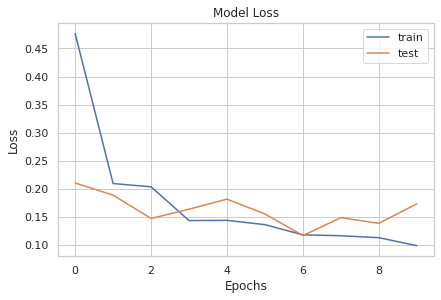

In [99]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

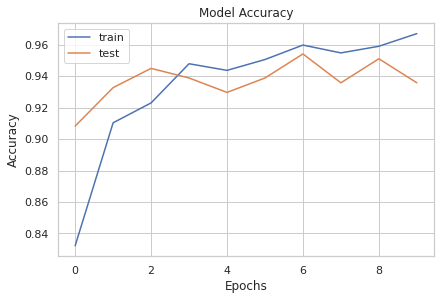

In [100]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [101]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [102]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==100):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==100):
        break

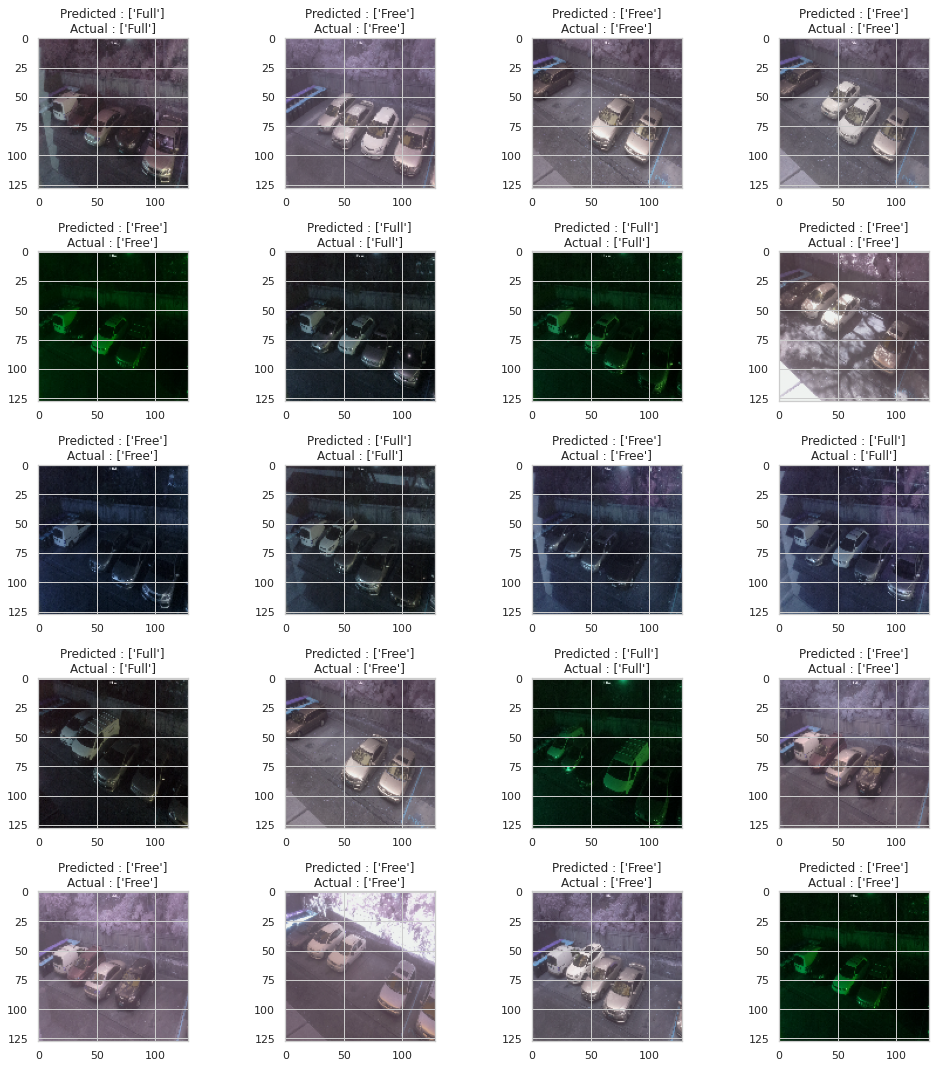

In [103]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(5,4)
fig.set_size_inches(15,15)
for i in range (5):
    for j in range (4):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual : "+str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

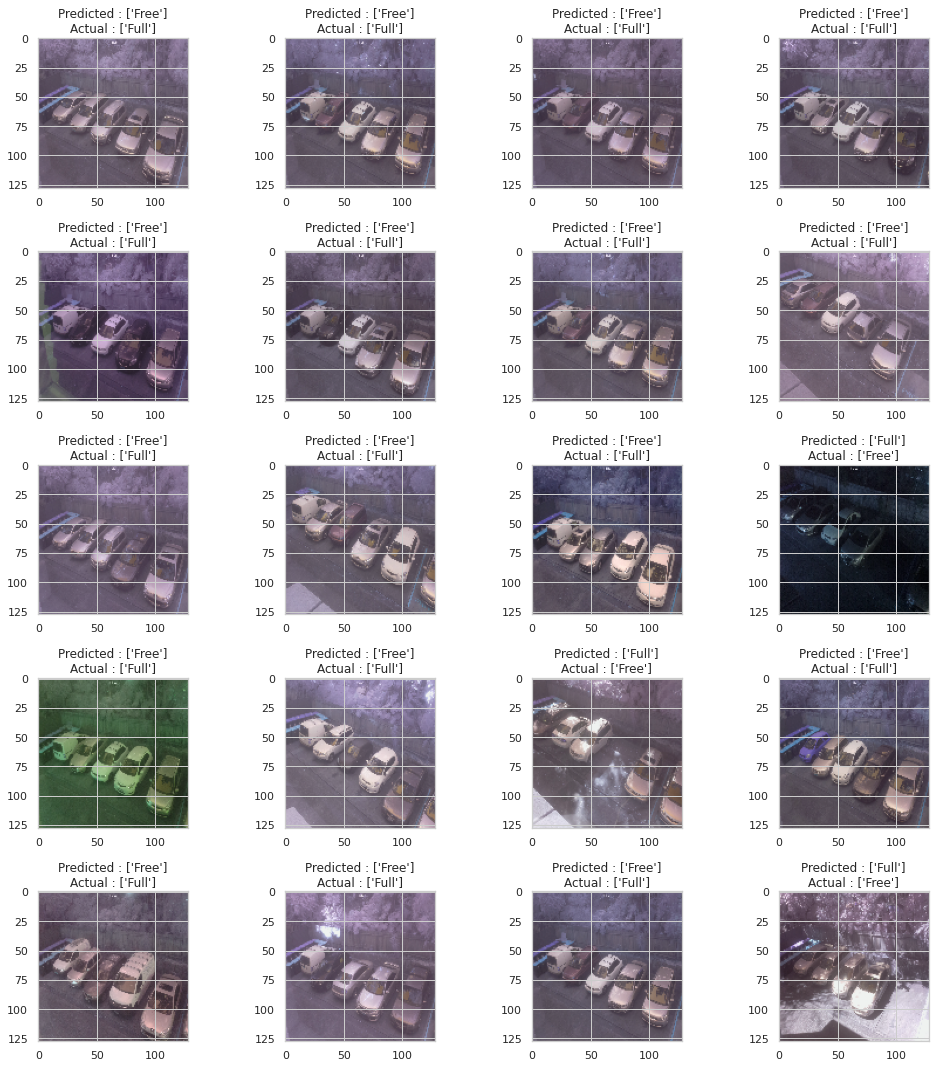

In [104]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(5,4)
fig.set_size_inches(15,15)
for i in range (5):
    for j in range (4):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual : "+str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1

In [105]:
(loss_score, accuracy_score) = model.evaluate(validation_generator,verbose=0)
print('Loss score',loss_score)
print('Accuracy score',accuracy_score)

Loss score 0.21187731623649597
Accuracy score 0.9357798099517822
